# Question 1
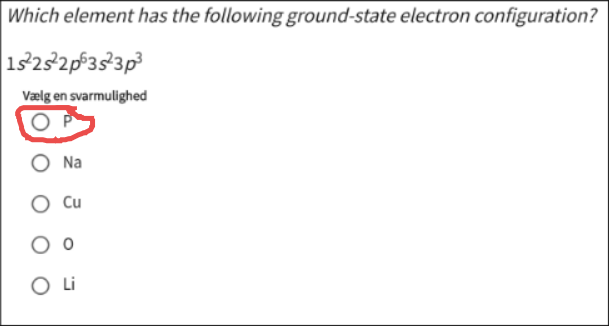

# Question 2
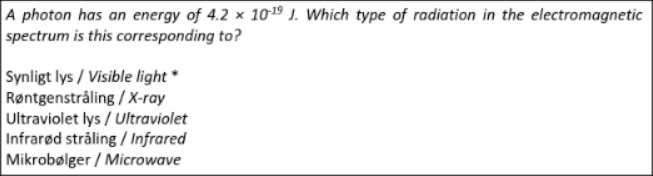

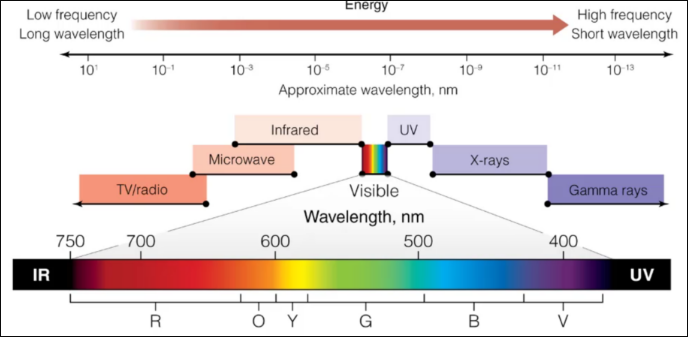

In [1]:
import quantum_mechanics as qm

# --- Given values ---
photon_energy_J = 4.2e-19

# --- Calculation ---
# Step 1: Find the wavelength in meters, then convert to nanometers
wavelength_m = qm.calculate_wavelength_from_energy(photon_energy_J)
wavelength_nm = qm.m_to_nm(wavelength_m)

# Step 2: Classify the radiation
radiation_type = qm.classify_radiation_from_wavelength(wavelength_nm)

# --- Display the result ---
print(f"A photon with energy {photon_energy_J:.1e} J has a wavelength of {wavelength_nm:.0f} nm.")
print(f"This corresponds to: {radiation_type}")

A photon with energy 4.2e-19 J has a wavelength of 473 nm.
This corresponds to: Visible light


# Question 3
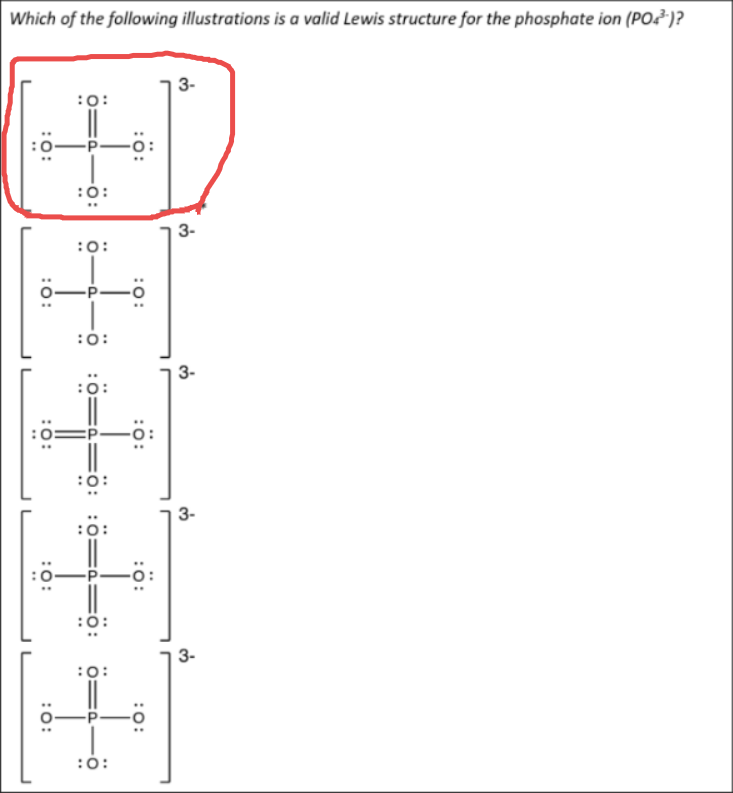

# Question 4
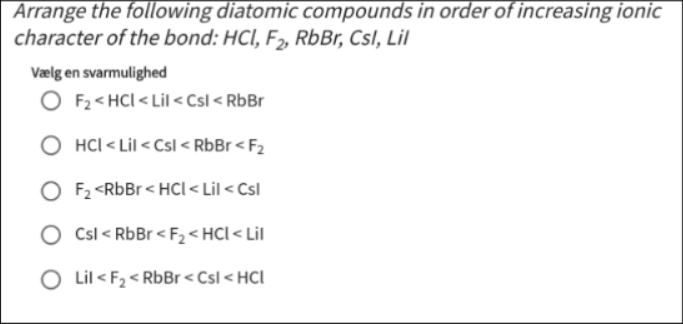


In [2]:
import molecular_structure as ms

# --- Compounds from the problem ---
compounds_to_rank = ["HCl", "F2", "RbBr", "CsI", "LiI"]

# --- Calculation ---
ranked_order = ms.rank_by_ionic_character(compounds_to_rank)

# --- Display the result ---
print("The compounds in order of increasing ionic character are:")
print(ranked_order)


The compounds in order of increasing ionic character are:
F2 < HCl < LiI < CsI < RbBr


# Question 5
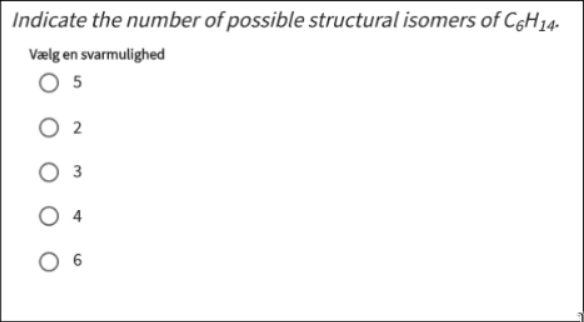

In [3]:
# --- Given formula ---
alkane_formula = "C6H14"

# --- Calculation ---
try:
    num_isomers = ms.count_alkane_isomers(alkane_formula)
    print(f"The number of possible structural isomers for {alkane_formula} is: {num_isomers}")
except (ValueError, NotImplementedError) as e:
    print(e)

The number of possible structural isomers for C6H14 is: 5


# Question 7
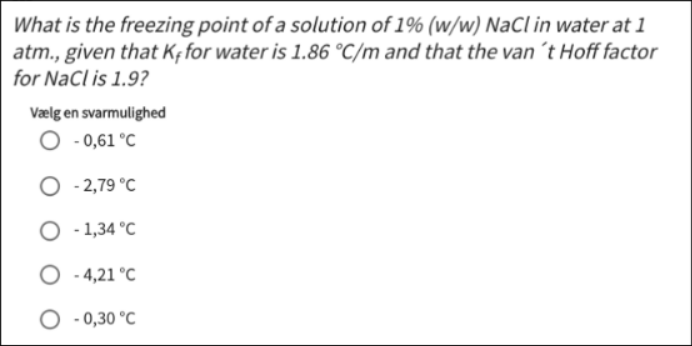

In [4]:
from compound import Compound
import solutions as sol

# --- Given values ---
mass_solute_g = 1.0
mass_solution_g = 100.0
kf_water = 1.86
i_factor = 1.9

# --- Step 1: Calculate Molality ---
# Mass of solvent in kg
mass_solvent_kg = (mass_solution_g - mass_solute_g) / 1000

# Moles of solute
nacl = Compound("NaCl")
nacl.set_mass(mass_solute_g)
moles_solute = nacl.amount_mol

# Molality
molality = sol.calculate_molality(moles_solute, mass_solvent_kg, solvent_unit='kg')

# --- Step 2: Calculate the freezing point depression ---
# This uses your existing function
depression = sol.calculate_freezing_point_depression(
    solute_formula="NaCl", # Note: this argument is used to find 'i', but we'll override it
    molality=molality,
    kf_solvent=kf_water
)

# The function calculate_freezing_point_depression uses an ideal 'i'. We will recalculate with the given 'i'.
depression_real = i_factor * kf_water * molality
final_freezing_point = 0 - depression_real

print(f"The calculated molality is: {molality:.4f} m")
print(f"The freezing point depression is: {depression_real:.2f} °C")
print(f"The final freezing point of the solution is: {final_freezing_point:.2f} °C")


The calculated molality is: 0.1728 m
The freezing point depression is: 0.61 °C
The final freezing point of the solution is: -0.61 °C


# Question 7
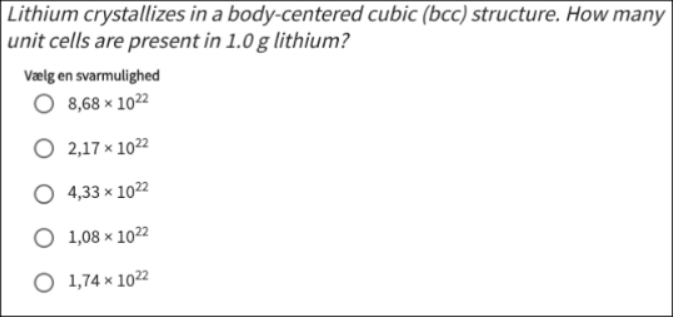

In [5]:
import solid_state as ss

# --- Given values from the problem ---
element = "Li"
mass = 1.0  # g
structure = "BCC"

# --- Calculation ---
unit_cells = ss.calculate_unit_cells_from_mass(
    element_symbol=element,
    mass_g=mass,
    crystal_type=structure
)

print(f"The number of unit cells in {mass} g of {element} is: {unit_cells:.2e}")

The number of unit cells in 1.0 g of Li is: 4.34e+22


# Question 8
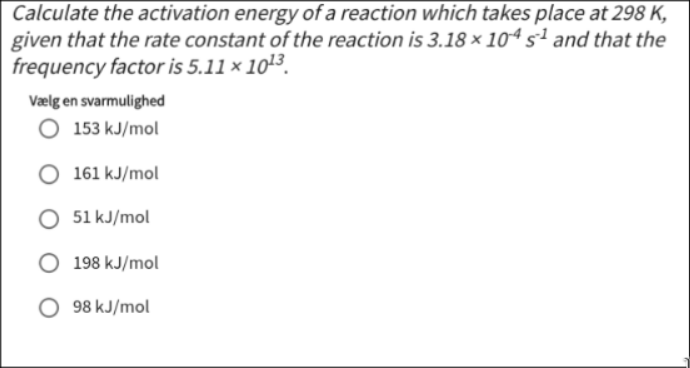

In [6]:
import kinetics as kin

# --- Given values ---
rate_constant = 3.18e-4
frequency_factor = 5.11e13
temperature = 298  # K

# --- Calculation ---
activation_energy_J = kin.calculate_activation_energy(
    k=rate_constant,
    A=frequency_factor,
    T_kelvin=temperature
)

# Convert from J/mol to kJ/mol for the answer
activation_energy_kJ = activation_energy_J / 1000

# --- Display the result ---
print(f"The activation energy is: {activation_energy_kJ:.0f} kJ/mol")

The activation energy is: 98 kJ/mol


# Question 9
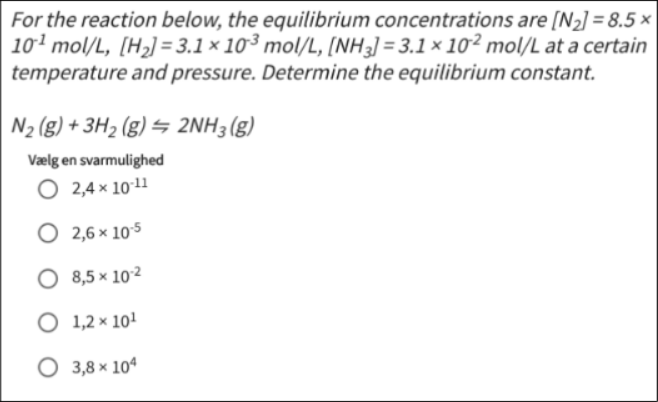

In [7]:
# --- 1. Define the compounds and the reaction ---
from equations import ChemicalEquation
import equilibrium as eq

n2 = Compound("N2"); n2.phase = 'g'
h2 = Compound("H2"); h2.phase = 'g'
nh3 = Compound("NH3"); nh3.phase = 'g'

reaction = ChemicalEquation(reactants=[n2, h2], products=[nh3])

# --- 2. Define the dictionary of equilibrium concentrations ---
concentrations = {
    n2: 8.5e-1,
    h2: 3.1e-3,
    nh3: 3.1e-2
}

# --- 3. Calculation ---
kc_value = eq.calculate_kc(reaction, concentrations)

print(f"The equilibrium constant Kc is: {kc_value:.1e}")

The equilibrium constant Kc is: 3.8e+04


# Question 10
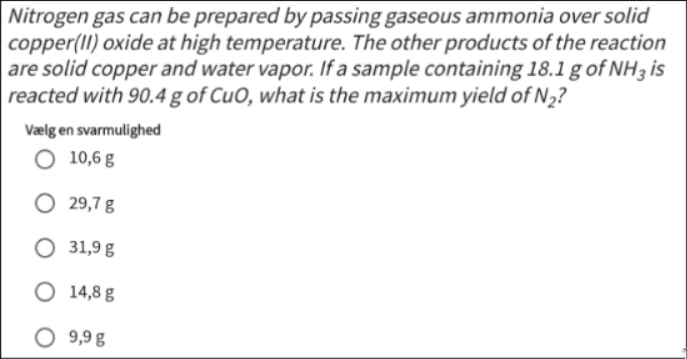

In [8]:
# --- 1. Define the compounds and their initial masses ---
nh3 = Compound("NH3"); nh3.set_mass(18.1)
cuo = Compound("CuO"); cuo.set_mass(90.4)

n2 = Compound("N2")
cu = Compound("Cu")
h2o = Compound("H2O")

# --- 2. Create the chemical equation ---
reaction = ChemicalEquation(
    reactants=[nh3, cuo],
    products=[n2, cu, h2o]
)

# --- 3. Calculate the theoretical yield ---
# The function will automatically balance the equation and find the limiting reactant.
limiting_reagent, yields = reaction.theoretical_yield({
    nh3: nh3.amount_mol,
    cuo: cuo.amount_mol
})

# --- 4. Display the results ---
n2_yield_grams = yields[n2][1] # Get the mass in grams

print(f"The limiting reactant is: {limiting_reagent.name()}")
print(f"The maximum yield of N2 is: {n2_yield_grams:.1f} g")


The limiting reactant is: Copper(II) oxide
The maximum yield of N2 is: 10.6 g


# Question 11
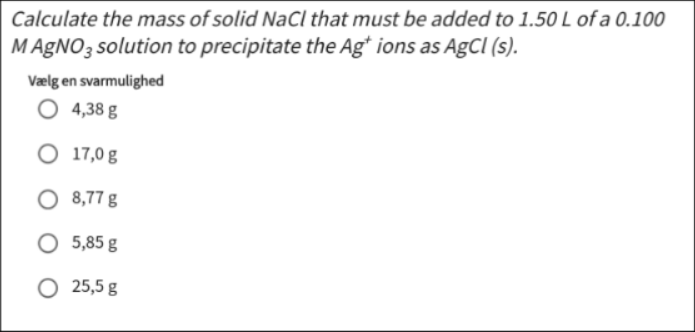

In [9]:
# --- Given values ---
volume_agno3_L = 1.50
molarity_agno3_M = 0.100

# --- Step 1: Calculate moles of AgNO3 (and thus Ag+) ---
moles_ag_ions = molarity_agno3_M * volume_agno3_L

# --- Step 2: Moles of NaCl needed is 1:1 with moles of Ag+ ---
moles_nacl_needed = moles_ag_ions

# --- Step 3: Calculate the required mass of NaCl ---
nacl = Compound("NaCl")
nacl.set_moles(moles_nacl_needed)

print(f"To precipitate all the Ag+ ions, you must add {nacl.mass_g:.2f} g of NaCl.")

To precipitate all the Ag+ ions, you must add 8.77 g of NaCl.


# Question 12
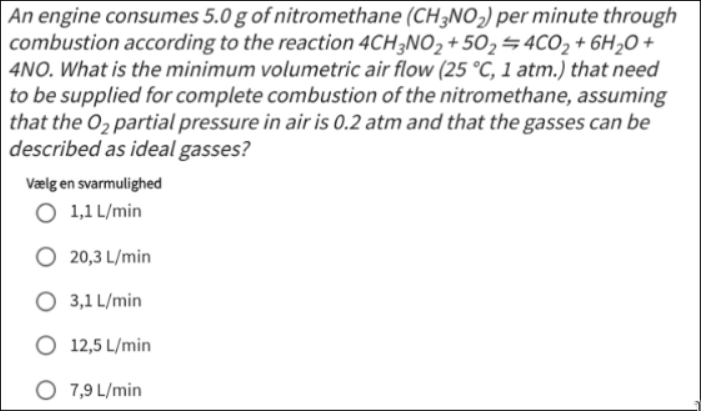

In [10]:
import gases

# --- Given values from the nitromethane problem ---
mass_nitromethane_per_min = 5.0  # g/min
temp_C = 25
pressure_atm = 1
o2_mole_fraction_in_air = 0.2 # From P_O2/P_total = 0.2/1.0

# --- Step 1: Calculate the molar flow rate of nitromethane (CH3NO2) ---
nitromethane = Compound("CH3NO2")
moles_nitromethane_per_min = mass_nitromethane_per_min / nitromethane.molar_mass

# --- Step 2: Use stoichiometry to find moles of O2 needed ---
# From the reaction 4CH3NO2 + 5O2 -> ..., the ratio is 5 moles O2 / 4 moles CH3NO2
moles_o2_per_min = moles_nitromethane_per_min * (5 / 4)

# --- Step 3: Calculate the total moles of air needed ---
# Air is 20% O2 by mole fraction
moles_air_per_min = moles_o2_per_min / o2_mole_fraction_in_air

# --- Step 4: Convert moles of air back to a volume flow rate ---
volume_air_per_min = gases.ideal_gas_volume(
    n=moles_air_per_min,
    T=temp_C,
    p=pressure_atm,
    T_unit='C',
    P_unit='atm',
    V_unit='L'
)

print(f"The minimum required air flow is: {volume_air_per_min:.1f} L/min")

The minimum required air flow is: 12.5 L/min


# Question 13
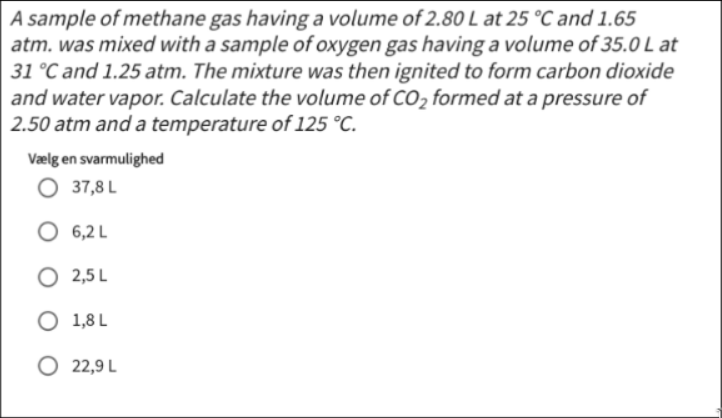

In [11]:
# --- Step 1: Calculate initial moles of each reactant ---
moles_ch4 = gases.ideal_gas_moles(V=2.80, T=25, P=1.65, V_unit='L', T_unit='C', p_unit='atm')
moles_o2 = gases.ideal_gas_moles(V=35.0, T=31, P=1.25, V_unit='L', T_unit='C', p_unit='atm')

# --- Step 2: Define the reaction and find the theoretical yield of CO2 ---
ch4 = Compound("CH4")
o2 = Compound("O2")
co2 = Compound("CO2")
h2o = Compound("H2O")

reaction = ChemicalEquation(reactants=[ch4, o2], products=[co2, h2o])

limiting_reagent, yields = reaction.theoretical_yield({
    ch4: moles_ch4,
    o2: moles_o2
})

moles_co2_produced = yields[co2][0]

# --- Step 3: Calculate the final volume of CO2 under the new conditions ---
final_volume_co2 = gases.ideal_gas_volume(
    n=moles_co2_produced,
    T=125,
    p=2.50,
    T_unit='C',
    P_unit='atm',
    V_unit='L'
)

print(f"Limiting reactant: {limiting_reagent.formula()}")
print(f"Moles of CO2 produced: {moles_co2_produced:.3f} mol")
print(f"The final volume of CO2 is: {final_volume_co2:.1f} L")

Limiting reactant: CH4
Moles of CO2 produced: 0.189 mol
The final volume of CO2 is: 2.5 L


# Question 14
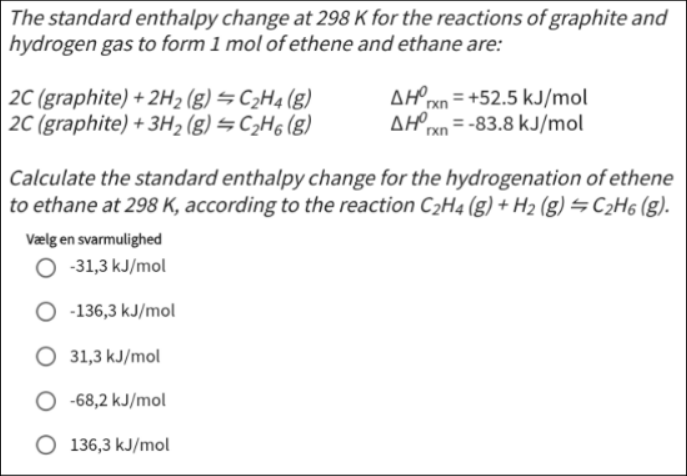

In [12]:
# --- Define the reactions as strings ---
import energy


target_reaction = "C2H4(g) + H2(g) -> C2H6(g)"

known_reactions = [
    "2C(graphite) + 2H2(g) -> C2H4(g)",
    "2C(graphite) + 3H2(g) -> C2H6(g)"
]

# --- Define the known enthalpy values ---
known_enthalpies = [52.5, -83.8]

# --- Calculation ---
total_enthalpy, multipliers = energy.solve_hess_law(
    target_reaction_str=target_reaction,
    known_reaction_strs=known_reactions,
    known_enthalpies=known_enthalpies
)

# --- Display the result ---
print(f"The standard enthalpy change for the reaction is: {total_enthalpy:.1f} kJ/mol")
print("\nReaction multipliers used:")
for reaction, mult in multipliers.items():
    print(f"  - Multiplier for '{reaction}': {mult}")

The standard enthalpy change for the reaction is: -136.3 kJ/mol

Reaction multipliers used:
  - Multiplier for '2C(graphite) + 2H2(g) -> C2H4(g)': -1.0
  - Multiplier for '2C(graphite) + 3H2(g) -> C2H6(g)': 1.0


# Question 15
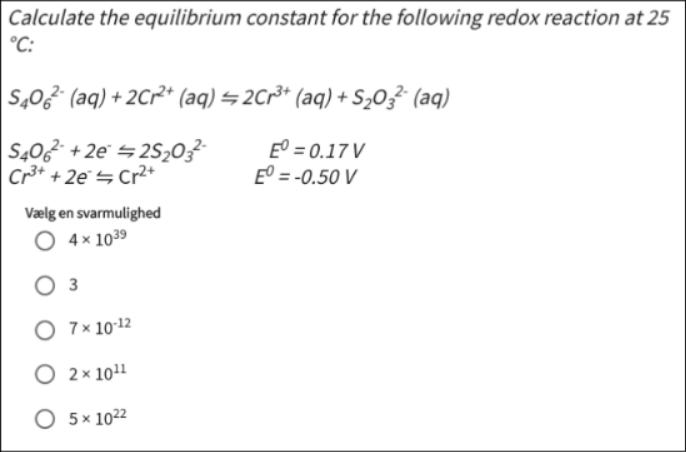

In [13]:
import electrochemistry as ec

# --- Given values from the problem ---
# The S4O6/S2O3 pair is the cathode (reduction)
e_cathode_val = 0.17

# The Cr3+/Cr2+ pair is the anode (oxidation)
e_anode_val = -0.50

# We determined that 2 electrons are transferred
n_val = 2

# --- Calculation ---
K_eq = ec.calculate_equilibrium_constant_from_potentials(
    E_cathode=e_cathode_val,
    E_anode=e_anode_val,
    n_electrons=n_val
)

# --- Display the result ---
print(f"The equilibrium constant K is: {K_eq:.1e}")

The equilibrium constant K is: 4.3e+22


In this it is 5e+22, so just go with the closest

# Question 16
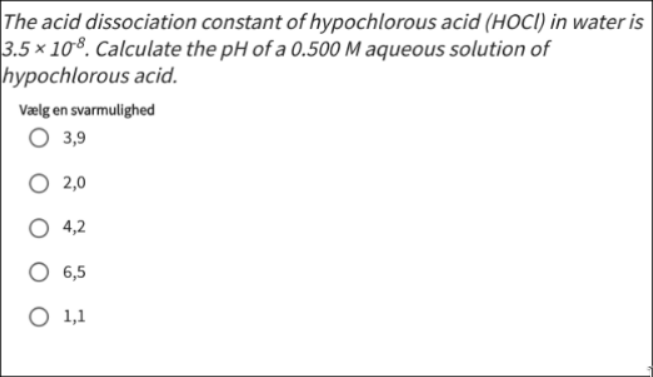

In [14]:
import acids_and_bases as ab

# --- Given values ---
initial_concentration = 0.500 # M
Ka_carbonic_acid = 3.50e-8

# --- Calculation ---
pH = ab.calculate_weak_acid_ph(initial_concentration, Ka_carbonic_acid)

print(f"The pH of the solution is {pH:.1f}")

The pH of the solution is 3.9


# Question 17
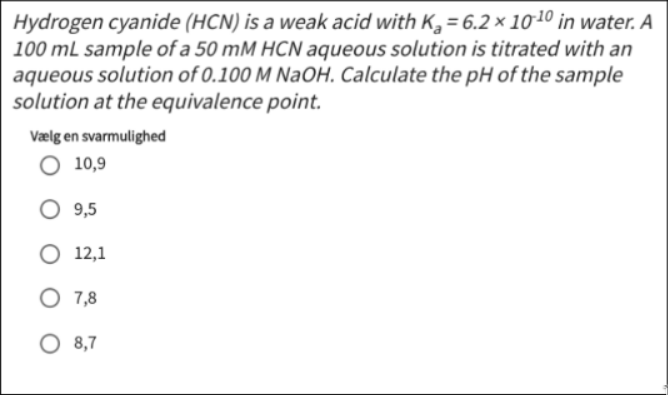

In [15]:
# --- Given values from the problem ---
conc_hcn_M = 0.050  # 50 mM
vol_hcn_mL = 100.0
Ka_hcn = 6.2e-10
conc_naoh_M = 0.100

# --- Calculation using the new function ---
ph_at_equivalence = ab.calculate_titration_ph_at_equivalence(
    initial_conc_acid=conc_hcn_M,
    initial_vol_mL_acid=vol_hcn_mL,
    Ka_acid=Ka_hcn,
    conc_base=conc_naoh_M
)

print(f"The pH at the equivalence point is: {ph_at_equivalence:.1f}")

The pH at the equivalence point is: 10.9


# Question 18
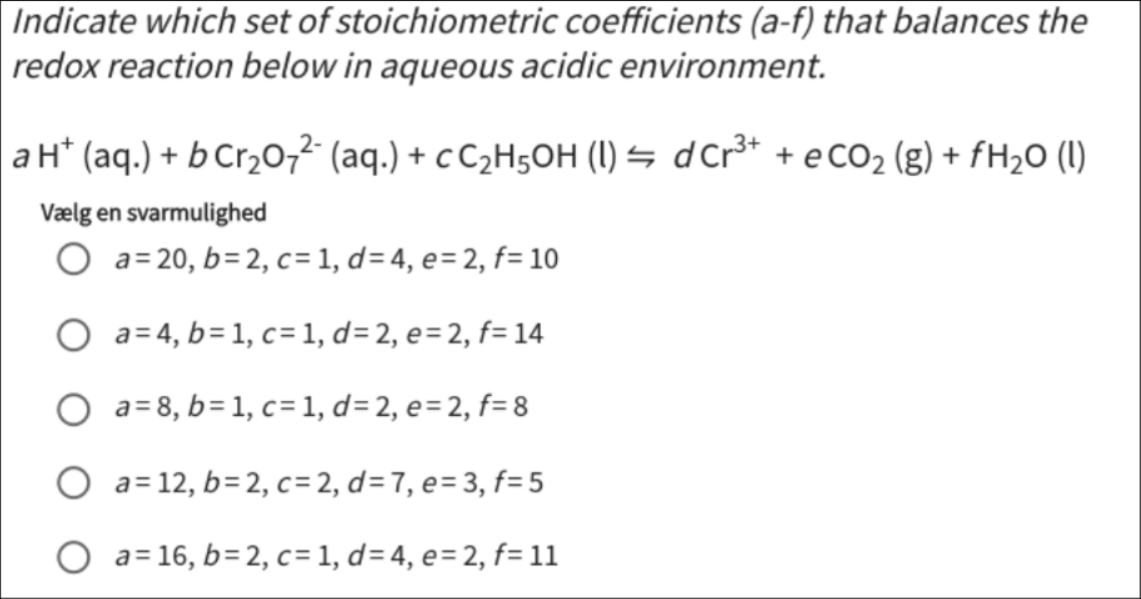

In [16]:
# In a cell in your electrochemistry_questions.ipynb notebook
from chempy import balance_stoichiometry
from pprint import pprint
import electrochemistry as ec # Assuming this contains your format_equation helper

# --- Define the core reactants and products ---
reactants = {'Cr2O7-2', 'C2H5OH'}
products = {'Cr+3', 'CO2'}

# --- Balance in ACIDIC Solution ---
# For acidic solutions, H+ can be a reactant and H2O a product
reac_balanced, prod_balanced = balance_stoichiometry(
    reactants | {'H+'},
    products | {'H2O'}
)

# --- Display the results ---
print("--- Reactant Coefficients ---")
pprint(dict(reac_balanced))
print("\n--- Product Coefficients ---")
pprint(dict(prod_balanced))

# --- Print the full, formatted equation ---
full_equation = ec.format_equation(reac_balanced, prod_balanced)
print(f"\nFull Equation:\n{full_equation}")

--- Reactant Coefficients ---
{'C2H5OH': 1, 'Cr2O7-2': 2, 'H+': 16}

--- Product Coefficients ---
{'CO2': 2, 'Cr+3': 4, 'H2O': 11}

Full Equation:
C2H5OH + 2 Cr2O7-2 + 16 H+ -> 2 CO2 + 4 Cr+3 + 11 H2O


# Question 19
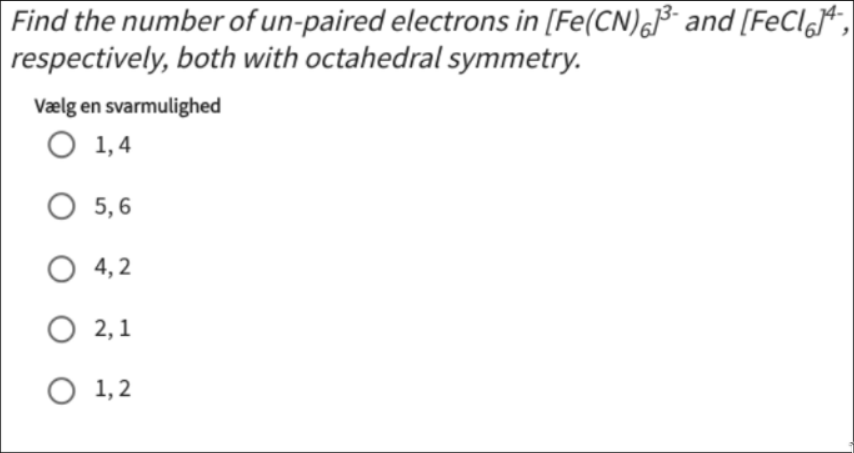

In [18]:
import materials

# --- Given values ---
formula = "[FeCl6]4-"

# --- Calculation ---
unpaired = materials.predict_unpaired_electrons(formula)

# --- Display the result ---
print(f"The predicted number of unpaired d electrons in {formula} is: {unpaired}")

The predicted number of unpaired d electrons in [FeCl6]4- is: 4


In [19]:
import materials

# --- Given values ---
formula = "[Fe(CN)6]3-"

# --- Calculation ---
unpaired = materials.predict_unpaired_electrons(formula)

# --- Display the result ---
print(f"The predicted number of unpaired d electrons in {formula} is: {unpaired}")

The predicted number of unpaired d electrons in [Fe(CN)6]3- is: 1


# Question 20
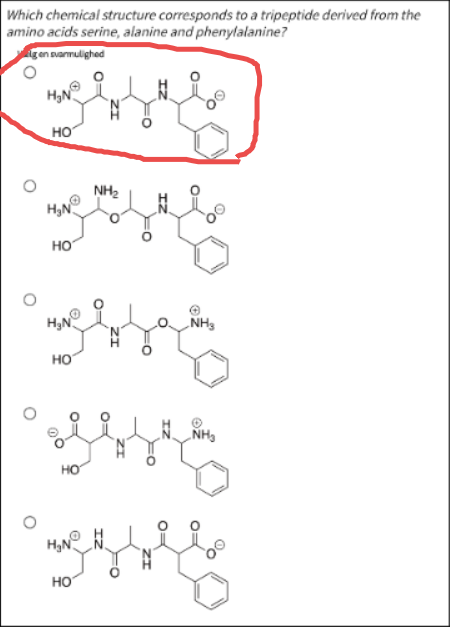